<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH-ML/blob/main/Rentiere_vs_Caribous_Musterl%C3%B6sung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⛄ Mathe^SH 🍪 Projekt Deep-Learning 🥳 Weihnachtsaufgabe ⛄

## Rentier vs. Caribou
<img src="https://github.com/ollihansen90/Mathe-SH-ML/blob/main/rentiervscaribou.png?raw=true" width="100%"/>

Dem Weihnachtsmann sind seine neun Rentiere entlaufen! Nach dem Füttern hat er vergessen, den Stall wieder abzuschließen, sodass Dasher, Dancer, Prancer, Vixen, Comet, Cupid, Donner, Blitzen und Rudolph rausgehen konnten, um im Schnee zu spielen. Leider haben sie nicht rechtzeitig zurückgefunden und mussten die Nacht draußen im Wald verbringen.

Glücklicherweise wurden sie von einer Herde Caribous aufgenommen, sodass sie die kalte Nacht gut überstehen konnten. Caribous gehören wie Rentiere ebenfalls zur Familie der Hirsche und sind deswegen vom Weihnachtsmann schwer auseinanderzuhalten. 

Der Weihnachtsmann bittet sofort seine Elfen, die magische Vermessungsmaschine anzuwerfen, um sämtliche Tiere der großen Herde von vorne bis hinten auszumessen. Die magische Vermessungsmaschine kann die Schulterhöhe (in m), Länge (in m), das Gewicht (in kg), Hufbreite (in cm), Fellfarbe (in RGB, also Rot-, Grün- und Blau-Kanal, Werte zwischen 0 (Schwarz) und 1 (Weiß) pro Kanal), Alter (in Jahren) und Felldichte (in Haare/cm^2) aufnehmen.

Schaffen wir es, einen linearen Klassifizierer zu trainieren, der aus der Liste der 100 Tiere die 9 Rentiere des Weihnachtsmannes findet?

### Gegebene Daten:
Geladen wird ein Numpy-Array `data_train`, in dem zeilenweise 10.000 Tierdaten mit 9 Variablen stehen. Es handelt sich also um eine $10.000\times9$-Matrix. Die Hälfte der Tiere sind Rentiere und die andere Hälfte sind Caribous, die der Weihnachtsmann aus anderen Herden (mit Labeln) generieren konnte.

Das Numpy-Array `data_test` enthält die Testdaten, in dem 100 Tiere stehen, von denen nur 9 Rentiere sind. Auch hier sind Label gegeben, allerdings sollten die auf keinen Fall zum Training benutzt werden.

Die Label bestehen aus `1` für "Rentier" und `0` für "Caribou".

Cloning into 'Mathe-SH_RvC_Weihnachten'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.
(10000, 9)
(100, 9)
(10000,)
(100,)
Tier: Rentier
Schulterhöhe: 1.81 m
Länge: 1.96 m
Gewicht: 149.68 kg
Hufbreite: 18.5 cm
Alter: 22.29 Jahre
Felldichte: 146.84 Haare/cm^2
Fellfarbe:


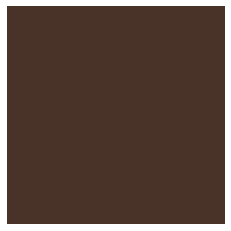

Tier: Caribou
Schulterhöhe: 1.37 m
Länge: 1.97 m
Gewicht: 117.12 kg
Hufbreite: 17.2 cm
Alter: 16.92 Jahre
Felldichte: 125.98 Haare/cm^2
Fellfarbe:


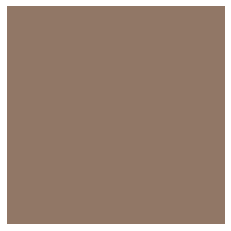

In [1]:
import sys, os
if 'google.colab' in sys.modules:
    if os.getcwd() == '/content':
        !git clone 'https://github.com/ollihansen90/Mathe-SH_RvC_Weihnachten.git'
        os.chdir("Mathe-SH_RvC_Weihnachten")

import numpy as np
from utils import steckbrief

data_train = np.load("data_train.npy")
print(data_train.shape)
data_test = np.load("data_test.npy")
print(data_test.shape)
label_train = np.load("label_train.npy")
print(label_train.shape)
label_test = np.load("label_test.npy")
print(label_test.shape)

steckbrief(data_train[0], label_train[0])
steckbrief(data_train[-2], label_train[-2])

### Hinweise:
Lineare Klassifizierer haben immer die Form 
$$w_1\cdot x_1+w_2\cdot x_2+\ldots+w_n\cdot x_n +b\geq0,$$
bei der die Gewichte als Vektor $w$ und der Bias als Parameter $b$ übergeben wird (manchmal hat das `b` ein negatives Vorzeichen, das kann aber automatisch vom Klassifizierer gelernt werden). Alternativ kann die Schreibweise mit Skalarprodukt genutzt werden:
$$w^Tx+b\geq0.$$
Zum Training sollten wir zur Aktivierung die Sigmoid-Funktion verwenden:
$$\sigma(x)=\frac{1}{1+e^{-x}}.$$

Solltest du ansonsten gar keinen Ansatz finden, kannst du gerne nochmal in eins unserer alten Notebooks gucken: 

https://github.com/ollihansen90/Mathe-SH-ML/blob/main/LinClass.ipynb

0 0.2947151071959647 0.5168
500 0.0017048061915183091 0.9994
1000 0.0006195792749102304 1.0
1500 0.0003380676901429458 1.0
2000 0.00021811964938909316 1.0
2500 0.00015444910478080315 1.0


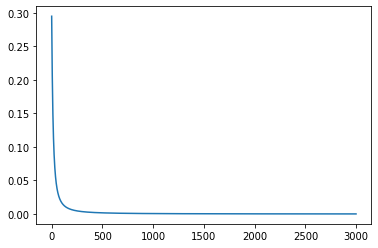

In [26]:
import matplotlib.pyplot as plt

def normalize_data(data):
    data = data-np.mean(data, axis=0)
    data = data/(np.std(data, axis=0)+0.00001)
    return data

data = normalize_data(data_train)

# Initialisiere Gewichte
w = np.random.randn(9)
dw = np.zeros(9)
b = np.random.randn(1)
db = 0

# Beispiel einer Klassifikation:
#datenpunkt = data_train[0]
#print(np.sign(w@datenpunkt+b)>=0) # "True" für Klasse 1 (Rentier), "False" für Klasse 0 (Caribou)

f = lambda x, w, b: x@w+b
s = lambda x: 1/(1+np.exp(-x))
ds = lambda x: s(x)*(1-s(x))

n_epochs = 3000
lossliste = np.zeros(n_epochs)
lr = 1e-1

for epoch in range(n_epochs):
    output = f(data, w, b)
    prediction = s(output)
    loss = np.mean((prediction-label_train)**2)
    lossliste[epoch] = loss
    
    for i in range(len(dw)):
        dw[i] = 2*np.mean((prediction-label_train)*ds(prediction)*data[:,i])
    db = 2*np.mean((prediction-label_train)*ds(prediction))*-1
    w = w - lr*dw
    b = b - lr*db

    if epoch%500==0:
        accuracy = np.mean(np.round(prediction)==label_train)
        print(epoch, loss, accuracy)

plt.figure()
plt.plot(lossliste)
plt.show()